# Create Combined Active Learning Figure
---

In [1]:
print("HELLO 13")

HELLO 13


# Notebook Setup

## Import Modules

In [2]:
import os
print(os.getcwd())
import sys

import copy

import pickle

import numpy as np

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# #############################################################################
from plotting.my_plotly import my_plotly_plot

/mnt/f/Dropbox/01_norskov/00_git_repos/PROJ_IrOx_Active_Learning_OER/workflow/ml_modelling/00_ml_workflow/191102_new_workflow/al_plots_for_figure


## Script Inputs

In [3]:
stoich_i = "AB3"

# Position of AL performance plot
# al_perf_subplot_coord = [3, 4]
al_perf_subplot_coord = [3, 5]

left_padding_subplot = True

## Read Data

In [4]:
# #############################################################################
# AL Performance ##############################################################
path_i = os.path.join(
    os.environ["PROJ_irox"],
    "workflow/ml_modelling/00_ml_workflow/191102_new_workflow/performance_comp/out_data",
    stoich_i + "_" + "fig_al_perf.pickle")
with open(path_i, "rb") as fle:
    fig_perf = pickle.load(fle)

# #############################################################################
# ALL Figures #################################################################
path_i = os.path.join(
    # os.environ[""],
    "out_data",
    stoich_i + "_" + "figs_dict.pickle")
with open(path_i, "rb") as fle:
    fig_dict = pickle.load(fle)

# fig_inset = fig_dict["fig_inset"]
# fig_main = fig_dict["fig_main"]
fig_al_series = fig_dict["fig_al_series"]

# Create Subplot

## Instantiate Subplot

In [5]:
# #########################################################
l_tmp = 0.
spec_00 = dict(l=l_tmp, b=0.)
spec_01 = dict()
spec_02 = dict()
spec_03 = dict()
spec_04 = dict()

# #########################################################
# t_tmp = 0.02
# t_tmp = 0.005
# t_tmp = 0.
# t_tmp = 0.002
# t_tmp = 0.003

# l_tmp = 0.045
# l_tmp = 0.035
l_tmp = 0.03
t_tmp = 0.0025
# spec_10 = dict(l=0.025, r=0., t=t_tmp, b=0.)
spec_10 = dict(l=0.03, r=0., t=t_tmp, b=0.)
spec_11 = dict(l=l_tmp, r=0., t=t_tmp, b=0.)
spec_12 = dict(l=l_tmp, r=0., t=t_tmp, b=0.)
spec_13 = dict(l=l_tmp, r=0., t=t_tmp, b=0.)
spec_14 = dict(l=l_tmp, r=0., t=t_tmp, b=0.)

# #########################################################
spec_20 = dict()
spec_21 = dict()
spec_22 = dict()
# spec_23 = dict(rowspan=1, colspan=2, l=0.2, t=0.1)
spec_23 = dict(rowspan=1, colspan=2, l=0.2, t=0.07)
spec_24 = None

# #########################################################
spec_0tmp = dict(rowspan=3)
spec_1tmp = None
spec_2tmp = None

# 0.16666666
dx_tmp = 0.11
dx_d6 = dx_tmp / 6
fig = make_subplots(
    rows=3, cols=6,
    specs=[
        [spec_0tmp, spec_00, spec_01, spec_02, spec_03, spec_04],
        [spec_1tmp, spec_10, spec_11, spec_12, spec_13, spec_14],
        [spec_2tmp, spec_20, spec_21, spec_22, spec_23, spec_24],
        ],
    print_grid=False,
    shared_yaxes=False,

    # horizontal_spacing=0.01,
    horizontal_spacing=0.015,

    # vertical_spacing=0.01,
    vertical_spacing=0.,
    row_heights=[0.33+0.06, 0.14-0.06, 0.53],
    column_widths=[1 / 6 - dx_tmp, 1 / 6 + dx_d6, 1 / 6 + dx_d6, 1 / 6 + dx_d6, 1 / 6 + dx_d6, 1 / 6 + dx_d6],
    )

## Add traces

In [6]:
# #############################################################################
# Add 1st row, AL progression #################################################
for trace_i in fig_al_series.data:
    if trace_i.xaxis == "x":
        if left_padding_subplot:
            col_i = 2
        else:
            col_i = 1

    else:
        if left_padding_subplot:
            col_i = int(trace_i.xaxis[1:])
            col_i += 1
        else:
            col_i = int(trace_i.xaxis[1:])

    fig.add_trace(
        trace_i,
        row=1,
        col=col_i,
        )


# #############################################################################
# Add 2nd row, smaller insets #################################################
for trace_i in fig_al_series.data:
    if trace_i.xaxis == "x":
        if left_padding_subplot:
            col_i = 2
        else:
            col_i = 1

    else:
        if left_padding_subplot:
            col_i = int(trace_i.xaxis[1:])
            col_i += 1
        else:
            col_i = 1

    fig.add_trace(
        trace_i,
        row=2,
        col=col_i,
        )


# #####################################1#######################################
# Add AL performance plot #####################################################
for trace_i in fig_perf.data:
    fig.add_trace(
        trace_i,
        row=al_perf_subplot_coord[0],
        col=al_perf_subplot_coord[1],
        )

# Setting master layout properties

In [7]:
%%capture

layout = fig_perf.layout

layout_tmp = go.Layout()

layout_tmp.font = layout.font
layout_tmp.paper_bgcolor = layout.paper_bgcolor
layout_tmp.plot_bgcolor = layout.plot_bgcolor
layout_tmp.showlegend = layout.showlegend

fig.update_layout(**layout_tmp.to_plotly_json())

# fig.layout.font


# #############################################################################
fig.update_layout(
    # width=10 + 18.4 * 37.795275591,  # COMBAK
    width=-7 + 18.4 * 37.795275591,  # COMBAK
    # height=12.0 * 37.795275591,
    height=14.0 * 37.795275591,

    paper_bgcolor="rgba(255,255,255,0.5)",
    # plot_bgcolor="rgba(255,255,255,0.5)",
    plot_bgcolor="rgba(255,255,255,0.5)",

    font=go.layout.Font({
        "color": "black",
        "family": "Arial, Times New Roman, monospace",
        # "family": "Times New Roman",
        }),

    margin=go.layout.Margin(
        b=10,
        l=0,
        r=0,
        t=10,
        ),

    )


# #############################################################################
axis_shared = dict(
    linecolor="black",
    linewidth=1.0,
    mirror=True,
    showgrid=False,
    showline=True,
    tickcolor="black",
    tickfont={"color": "black", "size": 10.666666666666666},
    ticks="outside",
    title={"font": {"color": "black", "size": 13.333333333333332}},
    zeroline=False,
    )

fig.update_xaxes(axis_shared)
fig.update_yaxes(axis_shared)

# Processing AL Main Plot (Row 01)
---

## Inset plot dimensions/ranges

In [8]:
y_range_inset_dict = {
    1: dict(range=[-2.65, 0.], dtick=1.0,
        tickmode = "array",
        tickvals = [-0.5, -1.5, -2.5],
        ),

    # 2: dict(range=[-2.9, -2.1], dtick=0.5,
    2: dict(range=[-2.9, -1.8], dtick=0.5,
        tickmode = "array",
        # tickvals = [-2.9, -2.3, -2.4, -2.5, -2.9],
        # tickvals = [-2.8, -2.6, -2.4, -2.2],
        # tickvals = [-2.7, -2.5, -2.3],
        tickvals = [-2.9, -2.6, -2.3, -2.],
        ),

    3: dict(range=[-2.63, -2.2], dtick=0.5,
        tickmode = "array",
        # tickvals = [-2.6, -2.5, -2.4, -2.3],           
        tickvals = [-2.5, -2.3],           
        ),

    4: dict(range=[-2.62, -2.35], dtick=0.2,
        tickmode = "array",
        tickvals = [-2.6, -2.5, -2.4],
        ),

    5: dict(range=[-2.62, -2.35], dtick=0.2,
        tickmode = "array",
        tickvals = [-2.6, -2.5,  -2.4, -2.3],
        ),

    }

# inset_x_range = [-1, 15]
inset_x_range = [-1, 14]

## Update layout of 1st row (main) AL plots

In [9]:
%%capture

if left_padding_subplot:
    range_tmp = range(2, 7)
else:
    range_tmp = range(1, 6)

for col_i in range_tmp:
    # #################################
    xaxis_i = dict(
        # range=[-2, 15],
        range=[-30, 258],
        ticks="inside",
        showticklabels=False,
        )
    fig.update_xaxes(**xaxis_i, row=1, col=col_i)

    # ##################################
    yaxis_i = dict(
        dtick=1.0,
        # range=[-3.184, 5.529],
        # range=[-3.5, 5.529],
        # range=[-3.5, 5.5],
        range=[-3.5, 5.2],
        showticklabels=False,
        ticks="outside",
        )
    fig.update_yaxes(**yaxis_i, row=1, col=col_i)

if left_padding_subplot:
    col_i = 2
else:
    col_i = 1

fig.update_yaxes(patch=dict(
    # title=dict(
    #     font=dict(size=13.333333333333332),
    #     text="ΔH<sub>f</sub> (eV/atom)",
    #     ),

    showticklabels=True,
    # ticks="outside",
    ),

    selector=None, overwrite=True,
    row=1, col=col_i)

## Added inset rectangles on main plots

In [10]:
%%capture

shapes_tmp = []
for col_i, layout_i in y_range_inset_dict.items():

    if left_padding_subplot:
        col_i += 1

    range_y_i = layout_i["range"]

    if col_i == 1:
        xref = "x"
        yref = "y"
    else:
        xref = "x" + str(col_i)
        yref = "y" + str(col_i)


    # rect_extra_dx = 10
    # rect_extra_dx = 6
    # rect_extra_dy = 0.2
    # rect_extra_dy = 0.14

    shape_i = go.layout.Shape(
        type="rect",
        x0=inset_x_range[0] - 8,
        x1=inset_x_range[1] + 8,
        y0=range_y_i[0] - 0.14,
        y1=range_y_i[1] + 0.10,
        xref=xref,
        yref=yref,
        line=dict(
            color="black",
            width=1.,
            ),
        )

    shapes_tmp.append(shape_i)

fig.update_layout(shapes=shapes_tmp)

##  AL progression plots annotations

In [11]:
if left_padding_subplot:
    tmp = [str(i) for i in range(2, 7)]
else:
    tmp = [str(i) for i in range(1, 6)]
    tmp[0] = ""

axis_list = tmp

In [12]:
%%capture

if left_padding_subplot:
    left_x_pos = fig.layout.xaxis2.range[0]
    top_y_pos = fig.layout.yaxis2.range[1]    
else:
    left_x_pos = fig.layout.xaxis.range[0]
    top_y_pos = fig.layout.yaxis.range[1]

shared_annot_master = dict(
    font={'size': 10},
    showarrow=False,
    xanchor='left',
    yanchor='top')

shared_annot = dict(
    x=left_x_pos + 0,
    y=top_y_pos,
    # yref='y',
    yref='y2',
    yshift=2,
    xshift=-1,
    **shared_annot_master)

shared_annot_1 = dict(
    x=left_x_pos + 0,
    y=top_y_pos,
    yref='y2',
    yshift=-20 + 10,
    xshift=-1,
    **shared_annot_master)

shared_annot_2 = dict(
    x=left_x_pos + 0,
    y=top_y_pos,
    yref='y2',
    yshift=-30 + 10,
    xshift=-1,
    **shared_annot_master)


annotations = [

    dict(
        text="<b>i.</b>", xref="x" + axis_list[0],
        **shared_annot),
    dict(
        text="<b>ii.</b>", xref="x" + axis_list[1],
        **shared_annot),
    dict(
        text="<b>iii.</b>", xref="x" + axis_list[2],
        **shared_annot),
    dict(
        text="<b>iv.</b>", xref="x" + axis_list[3],
        **shared_annot),
    dict(
        text="<b>v.</b>", xref="x" + axis_list[4],
        **shared_annot),

    # #################################
    dict(
        text="Gen: 00", xref="x" + axis_list[0],
        **shared_annot_1),
    dict(
        text="Gen: 03", xref="x" + axis_list[1],
        **shared_annot_1),
    dict(
        text="Gen: 06", xref="x" + axis_list[2],
        **shared_annot_1),
    dict(
        text="Gen: 20", xref="x" + axis_list[3],
        **shared_annot_1),
    dict(
        text="Gen: 40", xref="x" + axis_list[4],
        **shared_annot_1),

    # #################################
    dict(
        text="# DFT: 5", xref="x" + axis_list[0],
        **shared_annot_2),
    dict(
        text="# DFT: 20", xref="x" + axis_list[1],
        **shared_annot_2),
    dict(
        text="# DFT: 35", xref="x" + axis_list[2],
        **shared_annot_2),
    dict(
        text="# DFT: 105", xref="x" + axis_list[3],
        **shared_annot_2),
    dict(
        text="# DFT: 205", xref="x" + axis_list[4],
        **shared_annot_2),

    ]
fig.update_layout(annotations=annotations,)

# Processing AL Inset Plots (Row 02)
---

## Update layout of 2nd row (small inset) AL plots

In [13]:
%%capture

if left_padding_subplot:
    range_tmp = range(2, 7)
else:
    range_tmp = range(1, 6)

for col_i in range_tmp:
    # #################################
    xaxis_i = dict(
        range=inset_x_range,
        )


    print(col_i)
    fig.update_xaxes(**xaxis_i, row=2, col=col_i)

    # #################################
    if left_padding_subplot:
        col_i_tmp = col_i - 1

    y_range_i = y_range_inset_dict.get(col_i_tmp, [-3.5, 0.5])

    yaxis_i = dict(
        showticklabels=True,
        **y_range_i,
        )
    fig.update_yaxes(**yaxis_i, row=2, col=col_i)


# Update middle plot of thin insets
if left_padding_subplot:
    col_i = 4
else:
    col_i = 3

# fig.update_xaxes(patch=dict(
#     title=dict(
#         font=dict(size=13.333333333333332),
#         text="Candidate Structures",
#         ),
#     ),
#     selector=None, overwrite=True,
#     row=2, col=col_i)

# Processing AL Performance Subplot (Row 03)
---

## Sett AL Perf annotations to that subplot

In [14]:
%%capture

subplot_i = fig.get_subplot(
    row=al_perf_subplot_coord[0],
    col=al_perf_subplot_coord[1])

for shape_i in fig_perf.layout.shapes:
    shape_i.xref = subplot_i.yaxis.anchor
    shape_i.yref = subplot_i.xaxis.anchor

shapes = fig_perf.layout.shapes

shapes_new = fig.layout.shapes + shapes
fig.update_layout(shapes=shapes_new)

In [15]:
%%capture

# fig.update_yaxes(
#     patch=dict(title=dict(font=dict(size=13.333333333333332), text="Systems discovered")),
#     overwrite=True,
#     row=al_perf_subplot_coord[0],
#     col=al_perf_subplot_coord[1])

fig.update_xaxes(
    patch=dict(title=dict(font=dict(size=13.333333333333332), text="DFT Calculations")),
    overwrite=True,
    row=al_perf_subplot_coord[0],
    col=al_perf_subplot_coord[1])

# Setting Master Annotations

In [16]:
shared_annot = go.layout.Annotation(
    xref="paper",
    yref="paper",
    showarrow=False,

    font=dict(
        color="black",
        size=13.33333333333333,
        ),

    )

new_annotations = [

    go.layout.Annotation(
        x=0.,
        y=0.873,
        text="ΔH<sub>f</sub> (eV/atom)",
        textangle=-90,
        **shared_annot.to_plotly_json()),

    go.layout.Annotation(
        x=0.8,
        y=0.1,
        text="Systems discovered",
        textangle=-90,
        **shared_annot.to_plotly_json()),

    go.layout.Annotation(
        x=0.558,
        y=0.47,
        text="Candidate Structures",
        **shared_annot.to_plotly_json(),
        ),

    ]

annot_old = fig.layout.annotations
annot_new = tuple(new_annotations) + annot_old

fig.layout.annotations = annot_new

# Display Figure

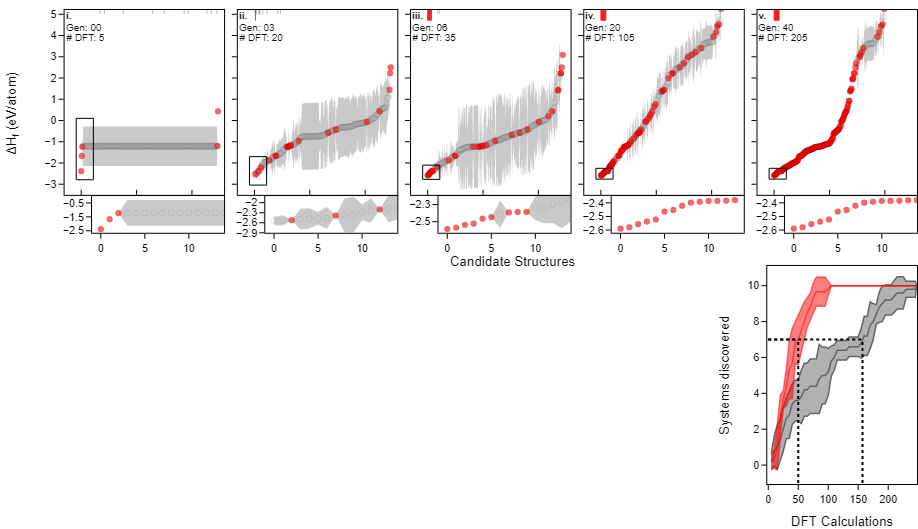

In [17]:
my_plotly_plot(
    figure=fig,
    plot_name="TEST_main_AL_plot",
    write_html=True,
    write_png=True,
    png_scale=1.0,
    write_pdf=True,
    write_svg=False,
    try_orca_write=False,
    )

In [18]:
13.333333 * (3/4)

9.99999975

In [19]:
10.666666666666666 * (3/4)

8.0

In [20]:
fig.layout

Layout({
    'annotations': [{'font': {'color': 'black', 'size': 13.33333333333333},
                     'showarrow': False,
                     'text': 'ΔH<sub>f</sub> (eV/atom)',
                     'textangle': -90,
                     'x': 0.0,
                     'xref': 'paper',
                     'y': 0.873,
                     'yref': 'paper'},
                    {'font': {'color': 'black', 'size': 13.33333333333333},
                     'showarrow': False,
                     'text': 'Systems discovered',
                     'textangle': -90,
                     'x': 0.8,
                     'xref': 'paper',
                     'y': 0.1,
                     'yref': 'paper'},
                    {'font': {'color': 'black', 'size': 13.33333333333333},
                     'showarrow': False,
                     'text': 'Candidate Structures',
                     'x': 0.558,
                     'xref': 'paper',
                     'y': 0.47,
                  